In [75]:
from loadFilteredData import *
#loading all data
origImg = loadAllTopicData('original')
gingHam = loadAllTopicData('gingham')
clarendon = loadAllTopicData('clarendon')

['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)
['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)
['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphithe

In [76]:
X, y, Xtest, ytest = createData([origImg, clarendon, gingHam], .9)

9000
9000
9000


In [77]:
X.shape

(24300, 128, 128, 3)

In [81]:
def threeChannelHistogram(images, bins):
    histograms = []
    for image in images:
        redHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        greenHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        blueHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        #print(np.hstack((redHist, greenHist, blueHist)))
        histograms.append(np.hstack((redHist, greenHist, blueHist)))
        #histograms.append(np.histogram(image, bins=bins, range=(0, 255))[0])
    return np.stack(histograms)

In [82]:
bins = 255
categories = 3
Xhist = threeChannelHistogram(X, bins)

In [14]:
from preprocessing import *
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim=bins * 3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(categories, activation='softmax'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Xhist, y, epochs=30, batch_size=256)

Epoch 1/30
24300/24300 [==============================] - 2s 69us/step - loss: 0.6070 - acc: 0.6878
Epoch 2/30
24300/24300 [==============================] - 1s 40us/step - loss: 0.3785 - acc: 0.7760
Epoch 3/30
24300/24300 [==============================] - 1s 41us/step - loss: 0.3487 - acc: 0.7940: 0s - loss: 0.3501 - 
Epoch 4/30
24300/24300 [==============================] - 1s 41us/step - loss: 0.3296 - acc: 0.8366
Epoch 5/30
24300/24300 [==============================] - 1s 41us/step - loss: 0.3122 - acc: 0.8581
Epoch 6/30
24300/24300 [==============================] - 1s 42us/step - loss: 0.2952 - acc: 0.8700
Epoch 7/30
24300/24300 [==============================] - 1s 41us/step - loss: 0.2843 - acc: 0.8756
Epoch 8/30
24300/24300 [==============================] - 1s 41us/step - loss: 0.2765 - acc: 0.8775
Epoch 9/30
24300/24300 [==============================] - 1s 40us/step - loss: 0.2686 - acc: 0.8839
Epoch 10/30
24300/24300 [==============================] - 1s 40us/step - loss

In [23]:
#Xhisttest = threeChannelHistogram(Xtest, bins=bins)
#predict = model.predict(Xhisttest)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest.argmax(axis=1), predict.argmax(axis=1)))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest.argmax(axis=1), predict.argmax(axis=1)))


[[669 213  18]
 [125 767   8]
 [  4   1 895]]
0.8633333333333333


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [27]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(ytest.argmax(axis=1), predict.argmax(axis=1))

(array([0.83834586, 0.78185525, 0.97176982]),
 array([0.74333333, 0.85222222, 0.99444444]),
 array([0.78798587, 0.81552366, 0.98297639]),
 array([900, 900, 900], dtype=int64))

In [85]:
from preprocessing import *
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim=bins * 3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(categories, activation='softmax'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Xhist, y, epochs=150, batch_size=256)

Epoch 1/150
24300/24300 [==============================] - 2s 65us/step - loss: 0.8513 - acc: 0.6573
Epoch 2/150
24300/24300 [==============================] - 1s 35us/step - loss: 0.5166 - acc: 0.7017
Epoch 3/150
24300/24300 [==============================] - 1s 36us/step - loss: 0.4863 - acc: 0.7012
Epoch 4/150
24300/24300 [==============================] - 1s 36us/step - loss: 0.4626 - acc: 0.7108
Epoch 5/150
24300/24300 [==============================] - 1s 36us/step - loss: 0.4362 - acc: 0.7443
Epoch 6/150
24300/24300 [==============================] - 1s 35us/step - loss: 0.4113 - acc: 0.8148
Epoch 7/150
24300/24300 [==============================] - 1s 35us/step - loss: 0.3880 - acc: 0.8827
Epoch 8/150
24300/24300 [==============================] - 1s 36us/step - loss: 0.3655 - acc: 0.8894
Epoch 9/150
24300/24300 [==============================] - 1s 36us/step - loss: 0.3450 - acc: 0.8946
Epoch 10/150
24300/24300 [==============================] - 1s 35us/step - loss: 0.3255 - a

24300/24300 [==============================] - 1s 35us/step - loss: 0.1415 - acc: 0.9442
Epoch 82/150
24300/24300 [==============================] - 1s 35us/step - loss: 0.1441 - acc: 0.9440
Epoch 83/150
24300/24300 [==============================] - 1s 35us/step - loss: 0.1426 - acc: 0.9451
Epoch 84/150
24300/24300 [==============================] - 1s 37us/step - loss: 0.1437 - acc: 0.9438
Epoch 85/150
24300/24300 [==============================] - 1s 38us/step - loss: 0.1343 - acc: 0.9475
Epoch 86/150
24300/24300 [==============================] - 1s 37us/step - loss: 0.1387 - acc: 0.9453
Epoch 87/150
24300/24300 [==============================] - 1s 35us/step - loss: 0.1391 - acc: 0.9471
Epoch 88/150
24300/24300 [==============================] - 1s 36us/step - loss: 0.1368 - acc: 0.9473
Epoch 89/150
24300/24300 [==============================] - 1s 36us/step - loss: 0.1367 - acc: 0.9466
Epoch 90/150
24300/24300 [==============================] - 1s 36us/step - loss: 0.1366 - acc: 

In [86]:
def threeChannelHistogram(images, bins):
    histograms = []
    for image in images:
        redHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        greenHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        blueHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        #print(np.hstack((redHist, greenHist, blueHist)))
        histograms.append(np.hstack((redHist, greenHist, blueHist)))
        #histograms.append(np.histogram(image, bins=bins, range=(0, 255))[0])
    return np.stack(histograms)
from sklearn.metrics import precision_recall_fscore_support
Xhisttest = threeChannelHistogram(Xtest, bins=bins)
predict = model.predict(Xhisttest)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest.argmax(axis=1), predict.argmax(axis=1)))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest.argmax(axis=1), predict.argmax(axis=1)))
precision_recall_fscore_support(ytest.argmax(axis=1), predict.argmax(axis=1))

[[725 160  15]
 [120 775   5]
 [  7   0 893]]
0.8862962962962962


(array([0.85093897, 0.82887701, 0.97809419]),
 array([0.80555556, 0.86111111, 0.99222222]),
 array([0.82762557, 0.84468665, 0.98510756]),
 array([900, 900, 900], dtype=int64))

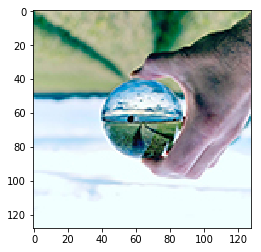

In [87]:
clarendonTestIm = plt.imread("clarendon-test.jpg")
plt.imshow(clarendonTestIm)

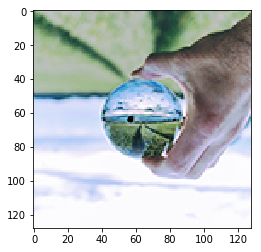

In [74]:
def clarendon(image):
    original_image = skimage.img_as_float(image)
    im = original_image
    #im = change_saturation(im, 1.5)
    #im = contrast_adjust(im, [0, 0.1, 0.5, 0.7, 0.9, 1])
    r, g, b = split_image_into_channels(im)
    r = channel_adjust(r, [0, 0.15, 0.55, 0.78, 1])
    g = channel_adjust(g, [0, 0.25, 0.7, 0.8, 1])
    b = channel_adjust(b, [0, 0.26, 0.7, 0.95, 1])
    im = merge_channels(r, g, b)
    return im
plt.imshow(clarendon(imBefore))
imAfter = clarendon(imBefore)
ginghamPredict = model.predict(threeChannelHistogram([imBefore], bins=bins))

In [90]:
clarendonPredict = model.predict(threeChannelHistogram([clarendonTestIm], bins=bins))
clarendonPredict

array([[9.8405945e-01, 1.5265054e-02, 6.7548611e-04]], dtype=float32)

In [30]:
imBefore = plt.imread("clarendon-before.jpg")

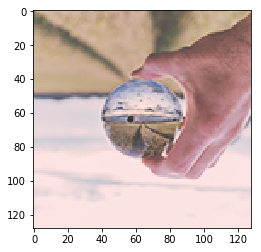

In [91]:
from instaFilters import *
plt.imshow(gingham(imBefore))
imAfter = gingham(imBefore)
ginghamPredict = model.predict(threeChannelHistogram([imAfter], bins=bins))

[[9.4233461e-02 9.0576649e-01 1.4994515e-32]]


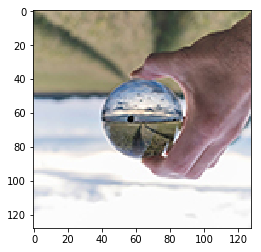

In [96]:
print(model.predict(threeChannelHistogram([imBefore], bins=bins)))
plt.imshow(imBefore)

[[1.2154458e-10 1.0000000e+00 0.0000000e+00]]


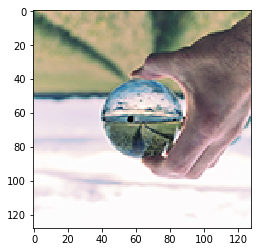

In [105]:
import instaFilters
print(model.predict(threeChannelHistogram([instaFilters.clarendon(imBefore)], bins=bins)))
plt.imshow(instaFilters.clarendon(imBefore))

In [39]:
ginghamPredict

array([[3.0766452e-02, 7.0855145e-07, 9.6923280e-01]], dtype=float32)

In [41]:
np.where(y.argmax(axis=1) == 2)

(array([    4,     5,     6, ..., 24292, 24294, 24296], dtype=int64),)

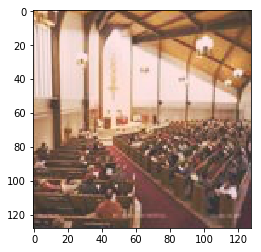

In [44]:
plt.imshow(X[24292])

In [45]:
model.predict(threeChannelHistogram([X[24292]], bins=bins))

array([[1.3982947e-04, 7.0976462e-06, 9.9985301e-01]], dtype=float32)